<a href="https://colab.research.google.com/github/kimhj010502/ESAA_OB/blob/main/WEEK14_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> [파이썬 딥러닝 텐서플로] </b> <br>
## Chapter 04 합성곱 신경망 (CNN)

## 4.1 합성곱 신경망 <br>
- 합성곱 신경망 (CNN: Convolutional Neural Network)은 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에서 많이 사용됨
- 대표적으로 이미지 분류 (Image Classification), 객체 탐지 (Object Detection), 스타일 전이 (Style Transfer) 등을 예로 들 수 있음
<br><br>
- 이미지 분류
<br><a href='https://ifh.cc/v-MSzRhd' target='_blank'><img src='https://ifh.cc/g/MSzRhd.jpg' border='0'></a>
- 모델이 이미지의 특징을 추출해 이미지를 인식할 수 있는 능력을 갖추게 됨
<br><br>
- 객체 탐지
<br><a href='https://ifh.cc/v-BxPrkX' target='_blank'><img src='https://ifh.cc/g/BxPrkX.jpg' border='0'></a>
- 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치가지 파악하는 기술로, 고양이 이미지의 위치에 표시된 노란색 실선을 경계 박스(bounding box)라고 부름
- 일반적으로 객체의 위치는 이미지의 좌표 값으로 나타내기 때문에, 경계 박스를 찾는 문제는 회귀분석으로 해결하고 클래스를 예측하는 문제는 분류 문제가 됨
<br><br>
- 스타일 전이는 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술을 말함


### 1-1 이미지 표현 <br>
- 이미지(또는 영상)를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함
<br><a href='https://ifh.cc/v-BLPvA2' target='_blank'><img src='https://ifh.cc/g/BLPvA2.png' border='0'></a>
- 왼쪽에 있는 손글씨 이미지는 오른쪽 그림과 같이 0~255 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현할 수 있음
- 숫자 0은 완전히 검은 색을 나타내고 숫자 255는 흰색을 나타내며, 그 중간에 있는 숫자들은 회색으로 표현됨
<br><br>
- 컬러 이미지는 R(빨강), G(초록), B(파랑) 채널로 구성된 3장의 이미지를 겹쳐서 표현함
<br><a href='https://ifh.cc/v-oOf9zA' target='_blank'><img src='https://ifh.cc/g/oOf9zA.jpg' border='0'></a>
- 각 채널 이미지는 채널이 1개인 흑백 이미지와 마찬가지로 0~255 사이의 숫자로 나타내며 숫자가 클수록 해당 색상을 더 강하게 표현함
- 채널은 각각이 하나의 이미지로 구분되며, 컬러 이미지는 3개의 채널 이미지를 하나로 결합하여 표현하는 방식임



### 1-2 합성곱 (Convolution) <br>
- 합성곱 연산은 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널(kernel, 필터)을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법을 말함
- 합성곱 연산을 통해서 추출된 이미지를 특성맵(feature map)이라고 부르며 이렇게 추출된 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보임
<br><br>
- 이미지에 필터를 적용하는 합성곱 연산
<br><a href='https://ifh.cc/v-yqVH51' target='_blank'><img src='https://ifh.cc/g/yqVH51.jpg' border='0'></a>
- 입력 이미지의 크기는 (세로, 가로) 순서로 shape이 출력됨
- 이러한 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영해 주고 이렇게 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산을 수행하게 됨
- 합성곱 연산은 element-wise 곱셈 연산을 수행 후 모두 더한 값으로 단일 스칼라 값이 나옴
- 이렇게 나온 결과는 추출된 이미지의 feature map의 좌측 상단 첫 번째 값이 됨
<br><br>
- 커널 사이즈가 3 x 3인 경우 총 9개의 가중치(weight)를 가지며 오차 역전파(back propagation) 시 커널의 가중치를 업데이트함
- 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치(shared weights) 때문임
- 오차 역전파 시 커널의 그래디언트(gradient)를 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적다는 장점이 있음


### 1-3 채널 (channel) <br>
- 채널은 입력 이미지를 구성하는 2차원 배열의 개수를 나타냄
- 흑백 이미지는 단일 채널, 즉 채널의 개수가 1개인 이미지이고 컬러 이미지의 경우 R, G, B 3개의 채널을 가지는 이미지이므로 Red, Green, Blue 채널 이미지 3장이 겹쳐서 컬러 이미지로 표현됨
- 컬러 이미지는 3개의 채널을 가지므로 세로 5픽셀, 가로 5픽셀의 컬러 이미지를 shape으로 나타냈을 때는 (5, 5, 3)으로 표현됨
<br><br>
- 컬러 이미지와 같이 입력 이미지가 여러 개의 채널을 갖는 경우, 합성곱 연산을 수행할 때 특성맵의 생성 과정을 잘 살펴봐야 함
- 우선 입력 이미지의 채널 개수만큼 커널이 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행함
- 이 과정을 거치면 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성되고, element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵이 생성됨
<br><a href='https://ifh.cc/v-aFxGdw' target='_blank'><img src='https://ifh.cc/g/aFxGdw.jpg' border='0'></a>
<br><br>
- 만약 합성곱 레이어에 출력 필터의 개수를 20개로 설정했다면, 입력 이미지의 채널 개수 3개와 출력 필터의 개수 20개가 곱해져서 총 60개의 커널이 생성됨
- 1개 커널의 사이즈를 3 x 3으로 설정했다면, (3 x 3 x 입력 채널 수 x 출력 필터 수) = 3 x 3 x 3개(R, G, B) x 20개(출력 필터 수) = 540개가 되므로 해당 층에서 업데이트할 가중치의 그래디언트는 540개가 됨
- 여기에 bias가 추가로 계산되는데 20개의 출력 필터 개수만큼 추가되므로 총 560개의 파라미터가 업데이트될 파라미터의 개수가 됨


### 1-4 스트라이드 (stride) <br>
- 커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나가는데, 이때 이동하는 간격을 스트라이드 (stride)로 정의하며 주로 1 또는 2로 설정함
<br><br>
- 스트라이드를 1로 설정 시 커널은 우측으로 1픽셀씩 이동하게 되며, 커널이 입력 이미지의 우측 끝까지 이동했다면 아래 방향으로 1칸 좌측 첫 번째 픽셀로 이동하여 추출함
- 스트라이드를 2로 설정하게 되면 2픽셀씩 건너뛰기 때문에 특성맵의 크기가 1/2로 줄어들게 됨
<br><a href='https://ifh.cc/v-2xGPom' target='_blank'><img src='https://ifh.cc/g/2xGPom.jpg' border='0'></a>
- 텐서플로 케라스에서 제공하는 Con2D 레이어의 `strides` 매개변수에 스트라이드를 지정할 수 있음

### 1-5 패딩 (padding) <br>
- 커널 크기가 3 x 3이고, 스트라이드에서 1로 설정하게 되는 경우에도 추출된 특성맵의 사이즈는 입력 이미지 대비 가로로 2픽셀, 세로로 2픽셀 줄어들게 됨
- 하지만 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 (padding)을 설정할 수 있음
<br><br>
- 일반적으로 zero-padding을 사용하게 되며, 입력 이미지의 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출하게 됨
- 패딩을 적용한 후 합성곱 연산을 수행하게 되면 특성맵의 크기가 줄어들지 않음
<br><a href='https://ifh.cc/v-KPQ3nY' target='_blank'><img src='https://ifh.cc/g/KPQ3nY.png' border='0'></a>
- 텐서플로 케라스의 Conv2D 레이어에서 `padding = 'same'`으로 설정하면 zero-padding을 적용함 (기본값: `padding = 'valid'`)

### 1-6 특성맵 (feature map) 사이즈 <br>
- 패딩과 스트라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식: 
- (Output Height, Output Width) = $(\frac{Image \space Height + 2P - Kernel \space Height}{S} + 1, \space \frac{Image \space Width + 2P - Kernel \space Width}{S} + 1 ) $
    - Image Height, Image Width: 입력 크기 (input size)
    - Kernel Height, Kernel Width: 필터 크기 (kernel size)
    - S: 스트라이드 (strides)
    - P: 패딩 (padding)
    - Output Height, Output Width: 출력 크기 (ouput size)

### 1-7 풀링 (pooling) <br>
- 풀링 (pooling) 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어임
- 풀링 레이어를 사용하면서 얻을 수 있는 이점으로는 이미지 축소를 통해 연산량을 감소한다는 점과 과대적합 (overfitting)을 방지함에 있음
<br><br>
- 풀링 레이어는 크게 최대 풀링 (max pooling)과 평균 풀링 (average pooling)으로 나뉘는데, 최대 풀링은 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념으로 도입되었으며 생각보다 좋은 성능을 발휘하기 때문에 합성곱 신경망과 같이 주로 사용됨
<br><a href='https://ifh.cc/v-tkmaVX' target='_blank'><img src='https://ifh.cc/g/tkmaVX.png' border='0'></a>
- 최대 풀링 수행 시 커널의 크기가 2 x 2로 주어질 때 입력 이미지의 2 x 2 픽셀 중 최대값이 출력값으로 설정되고 평균 풀링을 수행하면 2 x 2 픽셀들의 평균 값이 출력값으로 나옴
<br><br>
- 풀링 레이어도 역시 스트라이드 값을 가지며 스트라이드를 2로 설정하면, 2칸씩 건너뛰면서 풀링을 수행함
- 최대 풀링의 커널 크기를 2 x 2로 설정하고 스트라이드를 2로 설정 시 출력 이미지는 입력 이미지 대비 세로 1/2, 가로 1/2로 줄어들어 입력 이미지 대비 총 1/4 크기로 줄어듦

## 4.2 간단한 모델 생성

### 2-1 데이터 로드 및 전처리

In [1]:
#tensorflow 모듈 import 
import tensorflow as tf

In [2]:
#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


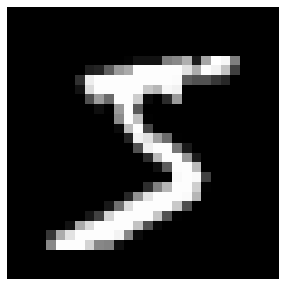

In [3]:
#샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx], cmap='gray')
    plt.axis('off')
    plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
#정규화 (Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


- mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 구성됨
- CNN 모델에 주입하기 위해서 색상을 나타내는 채널을 추가해줌

In [6]:
#채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis] #가장 마지막 축에 채널 추가 (첫번째 축: [tf.newaxis, ...], 두번째 축: [:,tf.newaxis,:,:])
x_valid_in = x_valid[..., tf.newaxis] #(60000, 28, 28) -> (60000, 28, 28, 1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2 Sequential API로 모델 생성 및 학습 <br>
- 최종 분류기로 Dense 레이어를 적용하기 위해, Flatten 층을 추가하여 1차원 배열로 펼쳐줌
- 합성곱은 Conv2D 레이어를 사용하고 (3, 3) 크기의 서로 다른 32가지 종류의 커널을 적용함
<br><a href='https://ifh.cc/v-k6B77v' target='_blank'><img src='https://ifh.cc/g/k6B77v.png' border='0'></a>
- 풀링 레이어는 (2, 2) 크기로 최대 풀링 (max pooling)을 적용함
- 최종 분류기는 정답 레이블이 0~9까지 10개의 값을 가지므로 노드 개수를 10으로 하고, 분류 클래스가 10개인 다중 분류 문제이므로 활성화 함수로 softmax를 적용함

In [7]:
#Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name='conv'),
    #Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 51s 26ms/step - loss: 0.2148 - accuracy: 0.9397 - val_loss: 0.0863 - val_accuracy: 0.9743
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0810 - accuracy: 0.9769 - val_loss: 0.0653 - val_accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0613 - accuracy: 0.9824 - val_loss: 0.0610 - val_accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0507 - accuracy: 0.9850 - val_loss: 0.0551 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0516 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0366 - accuracy: 0.9890 - val_loss: 0.0530 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0575 -

In [9]:
model.evaluate(x_valid_in, y_valid) #모델의 학습된 가중치를 사용하여 손실과 평가지표 계산

313/313 [==============================] - 4s 11ms/step - loss: 0.0667 - accuracy: 0.9817


[0.06673669070005417, 0.9817000031471252]

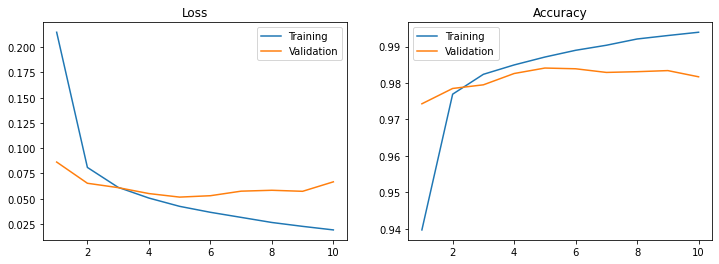

In [10]:
#모델의 예측 오차와 정확도를 그래프로 그리는 함수
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    axes[0].plot(range(1, epoch+1), loss, label='Training')
    axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), acc, label='Training')
    axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

### 2-3 모델 구조 파악 <br>
- 모델 인스턴스에 `summary()` 메소드를 적용해 주면, 모델의 구조를 요약해서 보여줌
<br><br>
- (28, 28, 1) 형태의 입력 텐서가 Conv2D를 거치면서 (26, 26, 32) 형태로 변환됨
- (3, 3) 크기의 합성곱 필터를 사용하기 때문에 이미지 가로, 세로 크기가 2씩 줄어듦 (패딩을 적용하지 않음)
- 서로 다른 32개의 필터를 적용했기 때문에 (26, 26) 크기의 특성맵이 32개 생성됨
- 즉, (28, 28, 1) 이미지에 서로 다른 32개 커널을 적용해서 32가지 종류의 피처(특징)를 추출하는 것임
<br><a href='https://ifh.cc/v-xpxtno' target='_blank'><img src='https://ifh.cc/g/xpxtno.png' border='0'></a>
- (2, 2) 크기의 풀링 레이어를 적용했기 때문에 이미지 크기가 1/2로 줄어듦
- 따라서, 풀링 레이어를 거치면 (13, 13, 32) 텐서로 변환되고, Flatten 층에서 3차원 텐서를 1차원 텐서로 펼치면 5408개 (13 x 13 x 32) 원소를 갖는 1차원 벡터가 됨
- 이 벡터를 출력 노드 10개인 Dense 레이어로 보내면 최종 분류 값을 예측해 출력함

In [11]:
#모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


- 생성된 모델 인스턴스의 `input` 속성으로부터 입력 레이어의 텐서를 추출할 수 있음
- 입력 텐서는 (None, 28, 28, 1) 형태인데, 가장 앞에 있는 축 (axis=0)의 None 값은 배치 크기가 들어오는 위치로서 배치 크기로 어떤 값이든 가능하다는 의미임

In [12]:
#입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

- 모델의 출력 텐서는 `output` 속성으로 선택할 수 있음
- 10개의 노드를 갖는 1차원 벡터 형태임

In [13]:
#출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

- 모델을 구성하는 레이어들을 추출하려면 `layers` 속성을 확인함
- 파이썬 리스트 형태로 레이어 객체를 담아서 보여줌

In [14]:
#레이어
model.layers

In [15]:
#첫 번째 레이어 선택
model.layers[0]

In [16]:
#첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
#첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

- 각 레이어의 가중치 행렬을 `weights` 속성을 사용하여 추출할 수 있음
- 코드의 실행 결과를 보면, 2개의 텐서플로 변수 행렬이 확인됨
- 첫 번째 변수는 'conv/kernel:0'이라는 이름과 같이 커널(합성곱 필터) 행렬의 가중치를 나타냄
- 두 번째 변수는 'conv/bias:0'이라는 이름과 같이 각 커널의 상수항(bias)을 나타냄

In [18]:
#첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.284998  ,  0.3307021 , -0.17635344, -0.3360816 ,
           -0.6965017 ,  0.13236518,  0.31444603,  0.02318181,
            0.55372643,  0.19770826,  0.08676314, -0.1951233 ,
           -0.2636788 ,  0.36165148, -0.07870151, -1.0379429 ,
            0.28607914, -0.9081166 , -0.43543634, -0.661531  ,
           -0.8643908 ,  0.06566277, -0.56843597,  0.2546126 ,
            0.33600423, -1.1760468 ,  0.20885022,  0.2661602 ,
            0.4036799 , -0.7411588 , -0.40226728, -0.66143256]],
 
         [[-0.2366035 ,  0.13310106, -0.16629326, -0.6226929 ,
            0.07597145,  0.36789963,  0.02133969, -0.43308622,
            0.12533343,  0.11508692,  0.4967602 ,  0.34661454,
            0.15787114, -0.36608103,  0.51387334, -0.9589742 ,
            0.19374032, -0.52587056,  0.13426581, -0.3302487 ,
            0.23303229, -0.25433338,  0.26882282, -0.22384478,
            0.35604838, -0.83361316,  0.44

- 실행 결과에서 커널 가중치의 shape이 (3, 3, 1, 32)라는 것을 알 수 있음
    - (3, 3): 필터의 크기
    - (1): 입력층의 채널 개수
    - (32): 출력층의 채널 개수
- 따라서, layer[0] 커널의 학습(업데이트) 가능한 파라미터의 수는 3 x 3 x 1 x 32 = 288개가 됨
- 상수항(bias) 가중치의 shape은 (32,)이고 이는 출력층의 개수를 말함
- 따라서, layer[0]의 총 학습 가능한 파라미터 수는 커널과 상수항을 더해서 288 + 32 = 320개가 됨

In [19]:
#첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.284998  ,  0.3307021 , -0.17635344, -0.3360816 ,
          -0.6965017 ,  0.13236518,  0.31444603,  0.02318181,
           0.55372643,  0.19770826,  0.08676314, -0.1951233 ,
          -0.2636788 ,  0.36165148, -0.07870151, -1.0379429 ,
           0.28607914, -0.9081166 , -0.43543634, -0.661531  ,
          -0.8643908 ,  0.06566277, -0.56843597,  0.2546126 ,
           0.33600423, -1.1760468 ,  0.20885022,  0.2661602 ,
           0.4036799 , -0.7411588 , -0.40226728, -0.66143256]],

        [[-0.2366035 ,  0.13310106, -0.16629326, -0.6226929 ,
           0.07597145,  0.36789963,  0.02133969, -0.43308622,
           0.12533343,  0.11508692,  0.4967602 ,  0.34661454,
           0.15787114, -0.36608103,  0.51387334, -0.9589742 ,
           0.19374032, -0.52587056,  0.13426581, -0.3302487 ,
           0.23303229, -0.25433338,  0.26882282, -0.22384478,
           0.35604838, -0.83361316,  0.44117254,  0.548835

In [20]:
#첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.06960038, -0.3821164 ,  0.26588753, -0.10089095, -0.14175957,
       -0.35323584, -0.3956939 , -0.2574513 , -0.09129833, -0.2051907 ,
       -0.00335555, -0.29183725, -0.19338384, -0.31137365, -0.00417225,
       -0.00957306, -0.13162562, -0.04438085, -0.05258455, -0.10754222,
       -0.07698105, -0.10056109, -0.08432876, -0.14466137, -0.20715228,
       -0.02497044,  0.00544932, -0.01051147, -0.34564108, -0.2455183 ,
       -0.00248608, -0.0518467 ], dtype=float32)>

In [21]:
#레이어 이름(name) 사용하여 레이어 선택
model.get_layer('conv')

In [22]:
#샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs = model.input,
                           outputs = [layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 193ms/step


2

In [23]:
#첫 번째 레이어 출력층
conv_activation = activations[0]
conv_activation.shape #1: 입력 이미지 개수 (샘플이 1개)

(1, 26, 26, 32)

- 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화함
- 출력 이미지의 특징이 조금씩 차이가 있으며, 각 커널은 입력 이미지로부터 서로 다른 피처(특징)을 추출하는 역할을 함

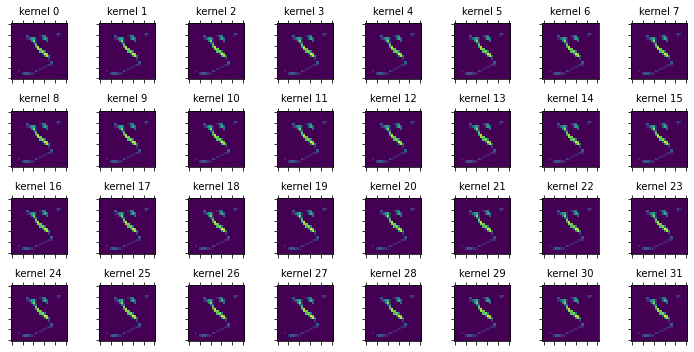

In [24]:
#Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0,:,:,1], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()    

In [25]:
#두 번째 레이어 (pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


- 앞서 Conv2D 출력 이미지에 비하여 화소 크기가 굵어짐
- 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있음

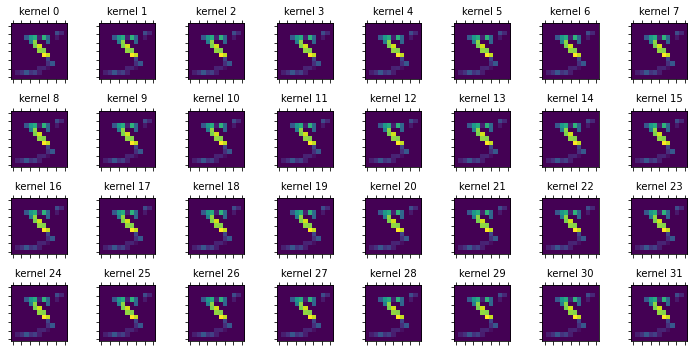

In [26]:
#Pooling 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0,:,:,1], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()    

## 4.3 복잡한 모델 생성 <br>
- 텐서플로 케라스의 Functional API를 사용하면, Sequential API로 구현할 수 없는 복잡한 구조의 모델을 정의할 수 있음
- 예를 들어, 각 레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델을 만들 수 있고, 중간에 있는 레이어들을 건너뛰고 뒤쪽에 있는 레이어로 출력 텐서를 전달하는 방식으로 직접 연결하는 방법도 가능함

### 3-1 데이터셋 준비

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 원본 mnist 데이터셋은 0~9까지 숫자를 손글씨로 쓴 이미지(x)와 정답(y) 숫자로 구성되어 있음
- 0~9까지 숫자를 맞추는 정답 외에 홀수인지 짝수인지를 판단하는 정답(y_odd)을 새로 만들어서 추가함
- y_train 값이 홀수면 1, 짝수면 0으로 하는 y_train_odd 배열을 새로 만듦
<br><a href='https://ifh.cc/v-kCTcQD' target='_blank'><img src='https://ifh.cc/g/kCTcQD.png' border='0'></a>

In [29]:
#새로운 출력 값 배열 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [30]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [31]:
#Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2 == 0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

- 입력 이미지 데이터를 255로 나눠서 정규화함
- 색상이 하나인 모노 컬러 이미지이므로, 새로운 축을 추가하고 채널 개수를 1개로 설정함
- 텐서플로 `expand_dims()` 함수에 원본 배열을 입력하고 새롭게 추가하려는 축의 인덱스를 지정하면 해당 인덱스에 새로운 축이 추가됨
- 축의 인덱스를 -1로 지정하면 새로운 축은 끝에 추가되어 (60000, 28, 28) 배열이 (60000, 28, 28, 1) 배열이 됨

In [32]:
#정규화 (Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

#채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성 <br>
- 아래의 코드에서 입력 레이어 inputs의 경우, Conv2D 레이어와 Flatten 레이어의 입력으로 사용되므로 입력 레이어는 2개의 출력을 갖게 됨
- 서로 다른 2개의 출력은 각각 다른 레이어의 입력으로 사용되고, 최종적으로 Concatenate 레이어에서 합쳐진 다음에 Dense 레이어를 통과함

In [34]:
#Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 26, 26, 32)   320         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_1[0][0]']               
                                                                                                  
 flatten_3 (Flatten)            (None, 5408)         0           ['max_pooling2d_1[0][0]']        
                                                                                            

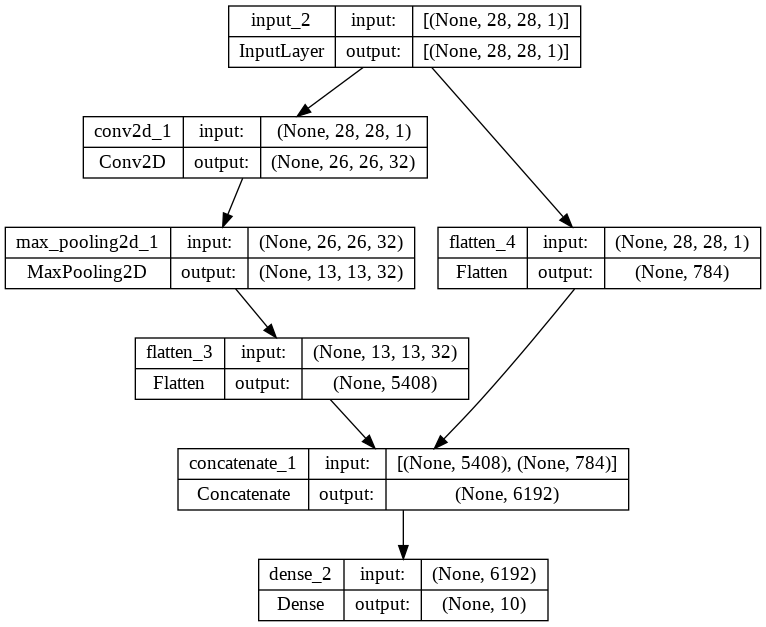

In [37]:
#모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

- 다중 분류 모델에 맞게 손실함수와 평가지표를 지정하고, 옵티마이저로는 adam을 사용함

In [38]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs = 10)

#모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2104 - accuracy: 0.9401 - val_loss: 0.0930 - val_accuracy: 0.9736
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0801 - accuracy: 0.9762 - val_loss: 0.0660 - val_accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0604 - accuracy: 0.9820 - val_loss: 0.0597 - val_accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0584 - val_accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0406 - accuracy: 0.9880 - val_loss: 0.0563 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0520 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0616 -

### 3-3 다중 출력 분류 모델 <br>
- 두 가지 서로 다른 분류 문제를 예측하는 다중 출력 모델로, 0~9까지 숫자를 맞추는 분류 문제와 홀수, 짝수를 맞추는 분류 문제를 동시에 풀어내는 모델임
- 각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심임
<br><a href='https://ifh.cc/v-XC670N' target='_blank'><img src='https://ifh.cc/g/XC670N.png' border='0'></a>

In [41]:
#Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [42]:
#모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


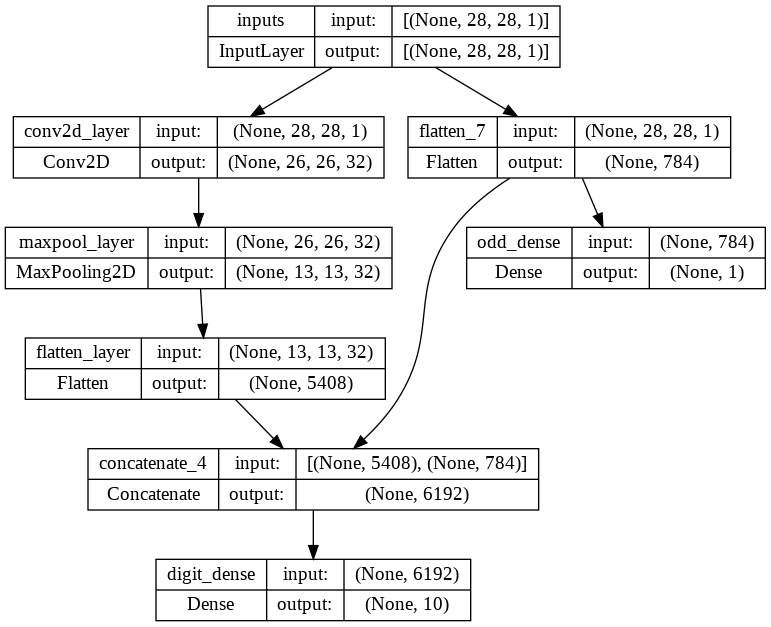

In [43]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

- 앞서 모델을 정의할 때 각각의 출력 Dense 레이어에 name 속성으로 'digit_dense', 'odd_dense'와 같은 이름으로 지정함
- 모델을 컴파일할 때 여기서 지정한 이름을 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정함
<br><br>
- 모델을 훈련시키기 위해 `fit()` 메소드를 적용할 때도 출력 값을 2개 지정하고, 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야 함

In [48]:
#모델 컴파일
model.compile(optimizer = 'adam', loss = {'digit_dense':'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights = {'digit_dense':1, 'odd_dense':0.5},
              #loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics = ['accuracy'])

#모델 훈련
history = model.fit({'inputs':x_train_in}, {'digit_dense':y_train, 'odd_dense':y_train_odd},
                    validation_data = ({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), 
                    epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3750 - digit_dense_loss: 0.2141 - odd_dense_loss: 0.3219 - digit_dense_accuracy: 0.9396 - odd_dense_accuracy: 0.8671 - val_loss: 0.2301 - val_digit_dense_loss: 0.0932 - val_odd_dense_loss: 0.2738 - val_digit_dense_accuracy: 0.9730 - val_odd_dense_accuracy: 0.8902
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2180 - digit_dense_loss: 0.0824 - odd_dense_loss: 0.2713 - digit_dense_accuracy: 0.9761 - odd_dense_accuracy: 0.8919 - val_loss: 0.2039 - val_digit_dense_loss: 0.0722 - val_odd_dense_loss: 0.2633 - val_digit_dense_accuracy: 0.9764 - val_odd_dense_accuracy: 0.8965
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1929 - digit_dense_loss: 0.0616 - odd_dense_loss: 0.2627 - digit_dense_accuracy: 0.9820 - odd_dense_accuracy: 0.8958 - val_loss: 0.1879 - val_digit_dense_loss: 0.0583 - val_odd_dense_loss: 0.2592 - val_digit_dense_accuracy: 0.9821 -

In [49]:
#모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 3s 9ms/step - loss: 0.1866 - digit_dense_loss: 0.0588 - odd_dense_loss: 0.2557 - digit_dense_accuracy: 0.9831 - odd_dense_accuracy: 0.9010


[0.18664568662643433,
 0.058805353939533234,
 0.25568053126335144,
 0.9830999970436096,
 0.9010000228881836]

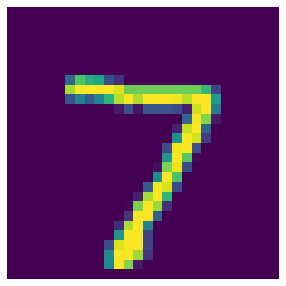

In [50]:
#샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx])
    plt.axis('off')
    plt.show()

plot_image(x_valid, 0)

In [51]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 11ms/step
[2.27504132e-13 3.23746530e-10 1.67580616e-09 1.15231035e-06
 1.20691478e-11 2.93558428e-12 5.47336445e-21 9.99998748e-01
 1.30728735e-08 1.02737854e-08]
[0.99960625]


In [53]:
digit_labels = np.argmax(digit_preds, axis=-1) #예측 확률을 실제 정답 레이블로 변환
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [54]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]
odd_labels[0:10]

<ipython-input-54-067746257099>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### 3-4 전이 학습 (Transfer Learning) <br>
- 앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성할 수 있음
- 이처럼 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념을 Transfer Learning이라고 부름
<br><a href='https://ifh.cc/v-PFOs8A' target='_blank'><img src='https://ifh.cc/g/PFOs8A.jpg' border='0'></a>

In [56]:
#앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

#앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


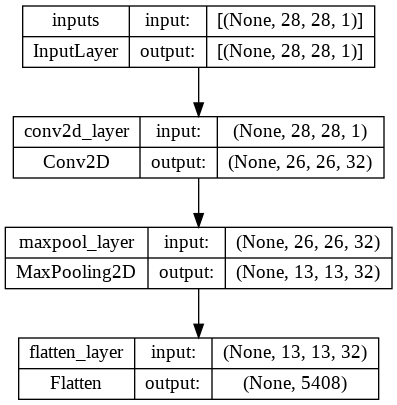

In [57]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [58]:
#Sequential API 적용
digit_model = tf.keras.Sequential([base_model, #앞에서 정의한 base_model을 레이어로 추가
                                   tf.keras.layers.Dense(10, activation='softmax')]) #최종 분류기 Dense 레이어 추가

digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


- Trainable params는 모델 훈련 시 파라미터 값이 업데이트됨

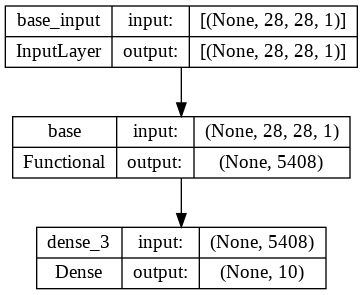

In [59]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [63]:
#모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = digit_model.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0807 - accuracy: 0.9759 - val_loss: 0.0636 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0528 - accuracy: 0.9847 - val_loss: 0.0507 - val_accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0601 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0487 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0513 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0522 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0563 -

In [64]:
#베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False #모델이 고정되어 훈련을 통해서 업데이트되지 않음
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


- 총 파라미터 개수는 54410개이고 앞서 고정한 320개의 파라미터는 훈련이 불가능함
- 훈련 가능한 파라미터는 Flatten 레이어의 출력 5408개와 Dense 레이어의 10개 노드 사이의 가중치만 해당됨
- 즉, Flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 포함되지 않게 됨

In [65]:
#Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [66]:
#모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                                 validation_data=(x_valid_in, y_valid),
                                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1185 - accuracy: 0.9676 - val_loss: 0.0568 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0497 - accuracy: 0.9855 - val_loss: 0.0472 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0481 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.0530 - val_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0487 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0537 - val_accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0532 -

- 모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법도 가능함

In [67]:
#베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [68]:
#Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [69]:
#모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                                  validation_data=(x_valid_in, y_valid),
                                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1158 - accuracy: 0.9692 - val_loss: 0.0591 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0501 - accuracy: 0.9852 - val_loss: 0.0469 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0366 - accuracy: 0.9891 - val_loss: 0.0510 - val_accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0513 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.0558 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0540 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.0572 -